In [2]:
import numpy as np 
import pandas as pd

import keras

from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Activation,Dropout,Flatten,Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

from keras.models import model_from_json

import tensorflow as tf

import cv2

import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
data = pd.read_csv('data/fer2013.csv')

pixels = data['pixels']
emotions = data['emotion']
usages = data['Usage']

In [3]:
num_classes = 7
x_train,y_train,x_test,y_test = [],[],[],[]

for emotion,img,usage in zip(emotions,pixels,usages):    
    try: 
        emotion = keras.utils.to_categorical(emotion,num_classes)
        val = img.split(" ")
        pixels = np.array(val,'float32')
        
        if(usage == 'Training'):
            x_train.append(pixels)
            y_train.append(emotion)
        elif(usage == 'PublicTest'):
            x_test.append(pixels)
            y_test.append(emotion)
    except:
        print("",end="")

In [4]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = x_train.reshape(-1,48,48,1)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_test = x_test.reshape(-1,48,48,1)

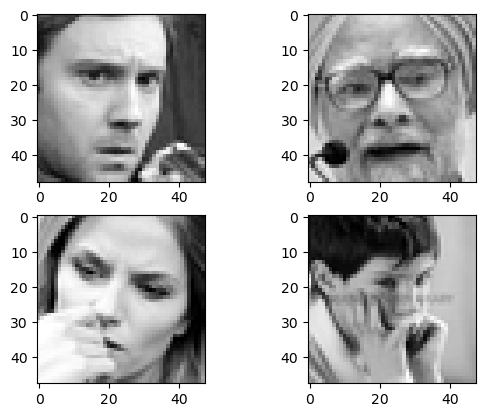

In [5]:
for i in range(4): 
    plt.subplot(221+i)
    plt.gray()
    plt.imshow(x_train[i].reshape([48,48]))

In [6]:
batch_size = 8
epochs = 20

model = Sequential()

#第一層
model.add(Conv2D(input_shape=(48,48,1),filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

#第二層
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

#第三層
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Flatten())

#連接層
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(7,activation = 'softmax'))

#訓練
model.compile(loss = 'categorical_crossentropy',optimizer = Adam(),metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs)


train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
 
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Epoch 1/20
3589/3589 [==============================] - 124s 34ms/step - loss: 1.8447 - accuracy: 0.2486
Epoch 2/20
3589/3589 [==============================] - 128s 36ms/step - loss: 1.7808 - accuracy: 0.2689
Epoch 3/20
3589/3589 [==============================] - 127s 35ms/step - loss: 1.6412 - accuracy: 0.3493
Epoch 4/20
3589/3589 [==============================] - 137s 38ms/step - loss: 1.5482 - accuracy: 0.3961
Epoch 5/20
3589/3589 [==============================] - 120s 33ms/step - loss: 1.4935 - accuracy: 0.4201
Epoch 6/20
3589/3589 [==============================] - 127s 35ms/step - loss: 1.4654 - accuracy: 0.4286
Epoch 7/20
3589/3589 [==============================] - 120s 33ms/step - loss: 1.4369 - accuracy: 0.4415
Epoch 8/20
3589/3589 [==============================] - 120s 33ms/step - loss: 1.4137 - accuracy: 0.4488
Epoch 9/20
3589/3589 [==============================] - 120s 33ms/step - loss: 1.3891 - accuracy: 0.4609
Epoch 10/20
3589/3589 [==============================] 

In [3]:
model = tf.keras.models.load_model('my_model.h5')
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    facecasc = cv2.CascadeClassifier('D:/anaconda3/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = facecasc.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        prediction = model.predict(cropped_img)
        maxindex = int(np.argmax(prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    cv2.imshow('Video', cv2.resize(frame,(500,400),interpolation = cv2.INTER_CUBIC))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 16ms/step


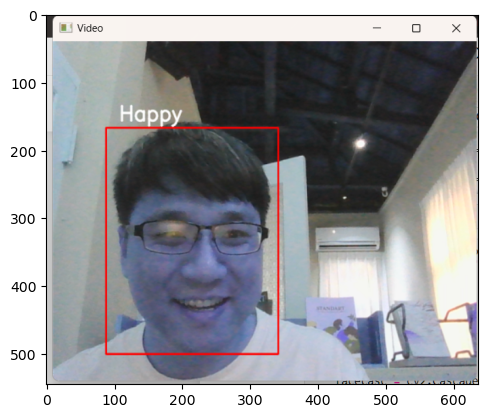

In [4]:
img = cv2.imread('0423.png')
plt.imshow(img)